In [2]:
from flask import Flask, request, Response, send_file
import numpy as np
import cv2
from PIL import Image
from io import StringIO
import matplotlib.pyplot as plt

from torchvision.models import resnet18
import torch.nn as nn

from torchvision.transforms import ToTensor, Resize, Compose
import torch
# Initialize the Flask application
app = Flask(__name__)

model = resnet18(True)

layer = model.layer1

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /Users/vaevictis/.torch/models/resnet18-5c106cde.pth
100%|██████████| 46827520/46827520 [00:01<00:00, 31986250.84it/s]


In [26]:
layer = model.layer1

cat = Image.open("cat.jpg")

input = Compose([Resize((224,224)), ToTensor()])(cat)

input = input.view(1,3,224,224)

output = model(input)

class Node():
    def __init__(self, p, v):
        self.p = p
        self.v = v
        self.c = []
        self.id = hash(v)
        
    def __str__(self):
        return str(self.v)
        
    def apply(self, func):
        for c in self.c:
            c.apply(func)
            
root = Node(p=None, v=model)

def traverse(node, module):        
    for m in module.children():
        if m not in node.c:
            child = Node(p=node, v=m)
            node.c.append(child)
            traverse(child, m)
    
# print(model.child[4].child)

In [49]:
traverse(root, model)

idx_to_nodes = {}
def traverse_nodes(x):
    idx_to_nodes[x.id] = x.v
    for c in x.c:
        traverse_nodes(c)
        
traverse_nodes(root)

nodes_to_idx = { v:k for k,v in idx_to_nodes.items()}

idx_to_nodes

{-9223372036571146685: BasicBlock(
   (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
   (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   (relu): ReLU(inplace)
   (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
   (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
 ),
 -9223372036571146622: MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False),
 -9223372036570092470: ReLU(inplace),
 -9223372036568252963: ResNet(
   (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
   (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   (relu): ReLU(inplace)
   (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
   (layer1): Sequential(
     (0): BasicBlock(
       (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), pa

Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
torch.Size([1, 64, 112, 112])


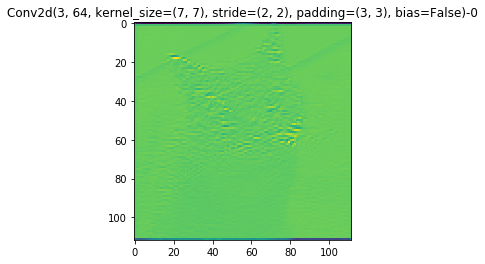

BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
torch.Size([1, 64, 112, 112])
ReLU(inplace)
torch.Size([1, 64, 112, 112])
MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
torch.Size([1, 64, 56, 56])
Sequential(
  (0): BasicBlock(
    (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace)
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (1): BasicBlock(
    (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace)
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)


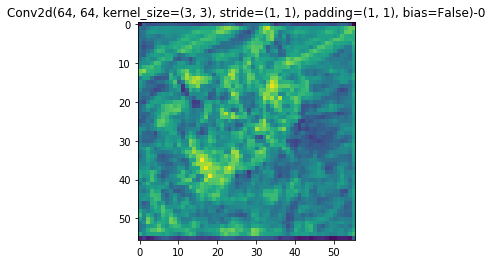

BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
torch.Size([1, 64, 56, 56])
ReLU(inplace)
torch.Size([1, 64, 56, 56])
Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
torch.Size([1, 64, 56, 56])


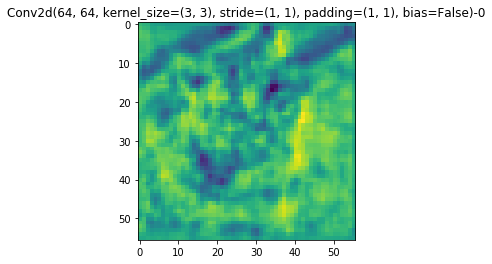

BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
torch.Size([1, 64, 56, 56])
BasicBlock(
  (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)
torch.Size([1, 64, 56, 56])
Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
torch.Size([1, 64, 56, 56])


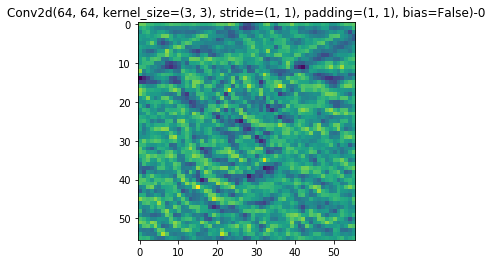

BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
torch.Size([1, 64, 56, 56])
ReLU(inplace)
torch.Size([1, 64, 56, 56])
Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
torch.Size([1, 64, 56, 56])


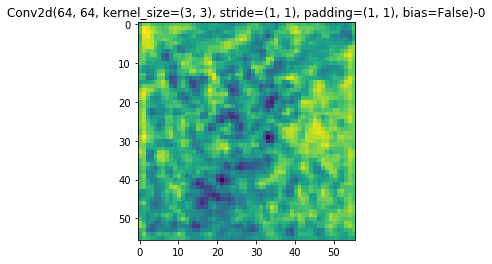

BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
torch.Size([1, 64, 56, 56])
Sequential(
  (0): BasicBlock(
    (conv1): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace)
    (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (downsample): Sequential(
      (0): Conv2d(64, 128, kernel_size=(1, 1), stride=(2, 2), bias=False)
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
  (1): BasicBlock(
    (conv1): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace)
    (conv2): Conv2d(128, 128, 

RuntimeError: Given groups=1, weight of size [128, 64, 3, 3], expected input[1, 128, 28, 28] to have 64 channels, but got 128 channels instead

In [65]:
x = input

# TODO need to flat
def traverse_nodes(x, node):            
    for c in node.c:
        l = c.v
    
        x = l(x)
        print(l)
        print(x.shape)
        
        if isinstance(l, nn.Conv2d):
            out = x.squeeze()
            f, w, h = out.shape

            for i, img in enumerate(out):
                img = img.detach().numpy()
                plt.title("{}-{}".format(l, i))
                plt.imshow(img)
                plt.show()
                break
        traverse_nodes(x, c)

traverse_nodes(x, root)

In [51]:
x = input

l = idx_to_nodes[-9223372036556319095].v

for l in model.children():
    if isinstance(l, nn.Conv2d):
        x = l(x)
        out = x.squeeze()
        print(out.shape)

        f, w, h = out.shape

        for i, img in enumerate(out):
            img = img.detach().numpy()
            plt.title("{}-{}".format(l, i))
            plt.imshow(img)
            plt.show()
            break

Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)


RuntimeError: Given groups=1, weight of size [128, 64, 3, 3], expected input[1, 3, 224, 224] to have 64 channels, but got 3 channels instead